#Convolutional Neural Networks
This note introduced convolutional neural networks, commonly referred as CNN, and provides us with an instance of digit recognition problem to be solved with CNN's. This note contains two parts:
1. Introduction to CNN's
2. Example of using CNN's


##Introduction to CNNs
Convolutional neural network is based on idea of working with patches or neighborhoods, rather than the whole object. For instance if we are given an image of size 224x224, and we wish to all pixels at once as inputs then we have $224\times 224 \simeq 40,000$ inputs. Assuming that the next layer of neural network contains 1000 nodes, we have around $40,000\times 1000 =40,000,000$ weight parameters for the first layer alone. This is a huge number. So, in order to decrease number of parameters that we are working on, one could consider not all pixel, but neighborhoods of pixels, say 5x5 square pixels, commonly referred as filters. This is just one of the possible motivations behind CNN's, there are many more. Let us learn more about Convolutional Neural Networks from the following sources:
* <a href="https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/">A Beginner's Guide To Understanding Convolutional Neural Networks (Blog Post by Adit Deshpande)</a>
* <a href="https://www.youtube.com/watch?v=FTr3n7uBIuE">Convolutional Neural Networks - The Math of Intelligence (Youtube Video by Siraj Raval)</a>

##Example of Using CNN
We are going to be building CNN based models for written digit recognition using a well-known MNIST dataset (<a href="http://yann.lecun.com/exdb/mnist/">Homepage</a> of MNIST Dataset). Here is an overview of this dataset.
1. Gray images of handwritten digits of size 28x28 pixels.
1. Dataset contains 60,000 images in total, out of which 50,000 are used for training and 10,000 are used for testing.

##Digit Recognition based on MNIST Dataset
Our strategy:
We will build progressively complex models starting from a very simple CNN, and utilizing more complex methods along the way. Here is a brief description of the models we are going to build:
1. Simple CNN.
1. Adding more layers.
1. Adding more layers and dropout.
1. Adding batch normalization (BN).
1. Transfer Learning using ResNet-34. 

Before we proceed to building these models we need to prepare setup, i.e.
1. Install and import necessary packages.
1. Import and load MNIST dataset.



#Setup Preparation

In [0]:
# install and import torch and torchvision
!pip install -q torch==1.0.0 torchvision
import torch
import torchvision
import torchvision.transforms as transforms


0it [00:00, ?it/s]

9920512it [00:01, 7660965.08it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 125126.85it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2056536.62it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 47346.44it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4

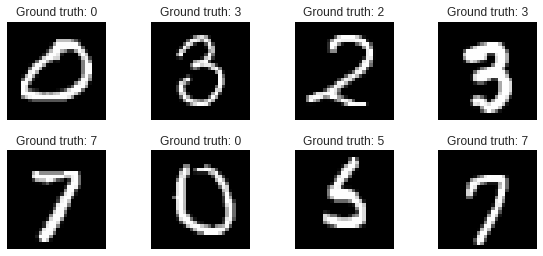

In [2]:
# download and prepare data
# set a manual seed for reproducibility of results.
torch.manual_seed(7)
# set a batch size for training models
batch_size = 8

# define transform on a dataset
# the values for mean and standard deviation for MNIST dataset is from 'https://nextjournal.com/gkoehler/pytorch-mnist'.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
# load MNIST data available in torchvision
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# prepare batches for both train_set and test_set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

# let us look at some of the training images
import matplotlib.pyplot as plt
import numpy as np

#roll batches
batches = enumerate(train_loader)
batch_id, (images, labels) = next(batches)

print(images)

fig = plt.figure()
for i in range(8):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground truth: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
  
  
  
  




##Constructing models
###Simple CNN




In [0]:
# simple CNN
import torch.nn as nn
import torch.nn.functional as F

class CNN_V1(nn.Module):
  def __init__(self):
    super(CNN_V1,self).__init__()
    self.conv = nn.Conv2d(1,3,3)
    self.fc = nn.Linear(3*26*26,10)
    
  def forward(self, x):
    x = F.relu(self.conv(x))
    x = x.view(-1, 3*26*26)
    x = self.fc(x)
    return x

###Adding More Layers

In [0]:
# adding more layers
import torch.nn as nn
import torch.nn.functional as F

class CNN_V2(nn.Module):
  def __init__(self):
    super(CNN_V2,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.fc1 = nn.Linear(6*24*24,100)
    self.fc2 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1, 6*24*24)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

###Adding More Layers and Dropout Layers

In [0]:
# adding more layers and dropout
import torch.nn as nn
import torch.nn.functional as F

class CNN_V3(nn.Module):
  def __init__(self):
    super(CNN_V3,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.conv3 = nn.Conv2d(6,15,3)
    self.conv3_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(15*22*22,100)
    self.fc1_drop = nn.Dropout()
    self.fc2 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.conv3_drop(F.relu(self.conv3(x)))
    x = x.view(-1, 15*22*22)
    x = F.relu(self.fc1(x))
    x = self.fc1_drop(x)
    x = self.fc2(x)
    return x

###Adding More Layers and Batch Normalization

In [0]:
#adding more layers and batch normalization
import torch.nn as nn
import torch.nn.functional as F

class CNN_V4(nn.Module):
  def __init__(self):
    super(CNN_V4,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.conv3 = nn.Conv2d(6,15,3)
    self.conv3_bn = nn.BatchNorm2d(15)
    self.conv4 = nn.Conv2d(15,30,3)
    self.conv4_bn = nn.BatchNorm2d(30)
    self.conv4_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(30*20*20,500)
    self.fc1_bn = nn.BatchNorm1d(500)
    self.fc1_drop = nn.Dropout()
    self.fc2 = nn.Linear(500,100)
    self.fc2_drop = nn.Dropout()
    self.fc3 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3_bn(self.conv3(x)))
    x = self.conv4_bn(self.conv4(x))
    x = self.conv4_drop(F.relu(x))
    x = x.view(-1, 30*20*20)
    x = self.fc1_bn(self.fc1(x))
    x = self.fc1_drop(F.relu(x))
    x = self.fc2_drop(F.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

##Initiating and Training models


In [14]:
# set up number of epochs
epochs = 2

# initiate models
cnn_v1 = CNN_V1()
cnn_v2 = CNN_V2()
cnn_v3 = CNN_V3()
cnn_v4 = CNN_V4()
# let's do a single forward prop as a sanity check
x = torch.rand(2,1,28,28)
out_v1 = cnn_v1(x)
out_v2 = cnn_v2(x)
out_v3 = cnn_v3(x)
out_v4 = cnn_v4(x)
print("Output for V1: {}".format(out_v1))
print("Output for V2: {}".format(out_v2))
print("Output for V3: {}".format(out_v3))
print("Output for V4: {}".format(out_v4))

Output for V1: tensor([[ 0.0085, -0.0168, -0.0716,  0.0792, -0.0089,  0.2301, -0.0455,  0.0198,
         -0.0403, -0.1368],
        [-0.0423,  0.0502,  0.0599,  0.1415, -0.0176,  0.1306,  0.0133, -0.0314,
         -0.0078, -0.1017]], grad_fn=<AddmmBackward>)
Output for V2: tensor([[-0.0035, -0.0154, -0.1059, -0.0844, -0.0672,  0.0608, -0.1142, -0.1013,
          0.0666, -0.0519],
        [ 0.0190, -0.0110, -0.0748, -0.0729, -0.0999,  0.0602, -0.1179, -0.0700,
          0.0731, -0.0595]], grad_fn=<AddmmBackward>)
Output for V3: tensor([[ 0.0078,  0.0400, -0.0782,  0.0130, -0.1160,  0.1464,  0.1158, -0.0240,
         -0.0310, -0.0739],
        [ 0.0240, -0.0265, -0.0503,  0.0642, -0.1317,  0.0664,  0.0645, -0.0447,
          0.0476, -0.0875]], grad_fn=<AddmmBackward>)
Output for V4: tensor([[ 0.1563,  0.3090, -0.2973, -0.0944,  0.3865,  0.1968,  0.0800, -0.1160,
         -0.2194, -0.0426],
        [ 0.2680,  0.3580, -0.0408, -0.0794, -0.0037, -0.0838,  0.0067,  0.0455,
          0.0963, 

In [16]:
# prepare GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


###Training cnn_v1

In [19]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_v1.parameters(), lr=0.001)

# wrap the model into gpu
cnn_v1.to(device)

# training loop
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v1(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/200))
      running_loss = 0
print('Finished Training')



Epoch: 0, Batch: 200 - Loss: 0.09081409649923444
Epoch: 0, Batch: 400 - Loss: 0.11412503485567868
Epoch: 0, Batch: 600 - Loss: 0.09266440269071609
Epoch: 0, Batch: 800 - Loss: 0.1019471222627908
Epoch: 0, Batch: 1000 - Loss: 0.11093067368492485
Epoch: 0, Batch: 1200 - Loss: 0.10419477491406724
Epoch: 0, Batch: 1400 - Loss: 0.07562544176122174
Epoch: 0, Batch: 1600 - Loss: 0.12293449342250824
Epoch: 0, Batch: 1800 - Loss: 0.06379808757919818
Epoch: 0, Batch: 2000 - Loss: 0.09311226944439113
Epoch: 0, Batch: 2200 - Loss: 0.11067786226980388
Epoch: 0, Batch: 2400 - Loss: 0.1136736636934802
Epoch: 0, Batch: 2600 - Loss: 0.10104291468160227
Epoch: 0, Batch: 2800 - Loss: 0.12839455345645548
Epoch: 0, Batch: 3000 - Loss: 0.1235307343211025
Epoch: 0, Batch: 3200 - Loss: 0.10038810547441245
Epoch: 0, Batch: 3400 - Loss: 0.1072027302812785
Epoch: 0, Batch: 3600 - Loss: 0.11966330540366471
Epoch: 0, Batch: 3800 - Loss: 0.08808071171166375
Epoch: 0, Batch: 4000 - Loss: 0.09791414052248001
Epoch: 0

###Training cnn_v2

In [21]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_v2.parameters(), lr=0.001)

# wrap the model into gpu
cnn_v2.to(device)

# training loop
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/200))
      running_loss = 0
print('Finished Training')

Epoch: 0, Batch: 200 - Loss: 0.883667321279645
Epoch: 0, Batch: 400 - Loss: 0.4388375504314899
Epoch: 0, Batch: 600 - Loss: 0.32481169544160365
Epoch: 0, Batch: 800 - Loss: 0.28674547746777534
Epoch: 0, Batch: 1000 - Loss: 0.19105149634182453
Epoch: 0, Batch: 1200 - Loss: 0.2466953592002392
Epoch: 0, Batch: 1400 - Loss: 0.20379347242414952
Epoch: 0, Batch: 1600 - Loss: 0.16668335787951946
Epoch: 0, Batch: 1800 - Loss: 0.20847314141690731
Epoch: 0, Batch: 2000 - Loss: 0.20358179554343223
Epoch: 0, Batch: 2200 - Loss: 0.1410105687379837
Epoch: 0, Batch: 2400 - Loss: 0.17072656661272048
Epoch: 0, Batch: 2600 - Loss: 0.1644044318050146
Epoch: 0, Batch: 2800 - Loss: 0.15318483404815197
Epoch: 0, Batch: 3000 - Loss: 0.11057861983776092
Epoch: 0, Batch: 3200 - Loss: 0.13759844742715358
Epoch: 0, Batch: 3400 - Loss: 0.13041406877338887
Epoch: 0, Batch: 3600 - Loss: 0.13798435360193254
Epoch: 0, Batch: 3800 - Loss: 0.12675825141370298
Epoch: 0, Batch: 4000 - Loss: 0.12077093489468098
Epoch: 0, 

###Training cnn_v3

In [22]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_v3.parameters(), lr=0.001)

# wrap the model into gpu
cnn_v3.to(device)

# training loop
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/200))
      running_loss = 0
print('Finished Training')

Epoch: 0, Batch: 200 - Loss: 1.5200825870037078
Epoch: 0, Batch: 400 - Loss: 0.8481321977823972
Epoch: 0, Batch: 600 - Loss: 0.6604422853142023
Epoch: 0, Batch: 800 - Loss: 0.5952262209355831
Epoch: 0, Batch: 1000 - Loss: 0.49028256177902224
Epoch: 0, Batch: 1200 - Loss: 0.5170204756408929
Epoch: 0, Batch: 1400 - Loss: 0.4325488954782486
Epoch: 0, Batch: 1600 - Loss: 0.40945327691733835
Epoch: 0, Batch: 1800 - Loss: 0.3908542595803738
Epoch: 0, Batch: 2000 - Loss: 0.4075993803143501
Epoch: 0, Batch: 2200 - Loss: 0.45056242421269416
Epoch: 0, Batch: 2400 - Loss: 0.38851805932819844
Epoch: 0, Batch: 2600 - Loss: 0.35695792131125925
Epoch: 0, Batch: 2800 - Loss: 0.3348085116967559
Epoch: 0, Batch: 3000 - Loss: 0.31987698391079905
Epoch: 0, Batch: 3200 - Loss: 0.30306055933237075
Epoch: 0, Batch: 3400 - Loss: 0.30765617623925207
Epoch: 0, Batch: 3600 - Loss: 0.3252751121670008
Epoch: 0, Batch: 3800 - Loss: 0.3324121344089508
Epoch: 0, Batch: 4000 - Loss: 0.27395688626915216
Epoch: 0, Batch

###Training cnn_v4

In [23]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_v4.parameters(), lr=0.001)

# wrap the model into gpu
cnn_v4.to(device)

# training loop
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v4(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/200))
      running_loss = 0
print('Finished Training')

Epoch: 0, Batch: 200 - Loss: 1.4571962144970894
Epoch: 0, Batch: 400 - Loss: 0.7247501852363348
Epoch: 0, Batch: 600 - Loss: 0.5987073288857937
Epoch: 0, Batch: 800 - Loss: 0.5820595023781061
Epoch: 0, Batch: 1000 - Loss: 0.4949829129874706
Epoch: 0, Batch: 1200 - Loss: 0.4551551349461079
Epoch: 0, Batch: 1400 - Loss: 0.46693351328372956
Epoch: 0, Batch: 1600 - Loss: 0.4756366084516048
Epoch: 0, Batch: 1800 - Loss: 0.4104981115460396
Epoch: 0, Batch: 2000 - Loss: 0.4511081735789776
Epoch: 0, Batch: 2200 - Loss: 0.3598404933512211
Epoch: 0, Batch: 2400 - Loss: 0.39632243938744066
Epoch: 0, Batch: 2600 - Loss: 0.39074073016643524
Epoch: 0, Batch: 2800 - Loss: 0.377101222127676
Epoch: 0, Batch: 3000 - Loss: 0.37430446207523344
Epoch: 0, Batch: 3200 - Loss: 0.371715896576643
Epoch: 0, Batch: 3400 - Loss: 0.33163882471621037
Epoch: 0, Batch: 3600 - Loss: 0.3553440885990858
Epoch: 0, Batch: 3800 - Loss: 0.3547813042253256
Epoch: 0, Batch: 4000 - Loss: 0.32066049180924894
Epoch: 0, Batch: 420

##Testing models

###Testing cnn_v1

In [24]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = cnn_v1(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of cnn_v1 on 10,000 test images is {}'.format(correct/total))

Accuracy of cnn_v1 on 10,000 test images is 0.9662


###Testing cnn_v2

In [25]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = cnn_v2(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of cnn_v2 on 10,000 test images is {}'.format(correct/total))

Accuracy of cnn_v2 on 10,000 test images is 0.9786


###Testing cnn_v3

In [26]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = cnn_v3(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of cnn_v3 on 10,000 test images is {}'.format(correct/total))

Accuracy of cnn_v3 on 10,000 test images is 0.9479


###Testing cnn_v4

In [27]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = cnn_v4(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of cnn_v4 on 10,000 test images is {}'.format(correct/total))

Accuracy of cnn_v4 on 10,000 test images is 0.9364


###Comments on test results
1. cnn_v2 did the best
1. cnn_v3 and cnn_v4 did worse than cnn_v2, even though cnn_v2 is much simpler model. One possible explanation lies in small number of epochs. Given more epochs cnn_v3 and cnn_v4 might have fared better.

#Transfer Learning
We are going to use ResNet-34 pretrained model.

In [28]:
# import resnet
from torchvision import models
resnet = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 40265079.32it/s]


In [29]:
# let us see the structure of the resnet
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
# resnet is made of convolution layers, which means that we could, in principle,
# supply an image of arbitrary size. The only thing we need to change is to modify
# number of channels of the first convolutional layer.
# moreover, we need to modify output of the resnet to have 10 class output
for param in resnet.parameters():
  param.requires_grad = False
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.fc = nn.Linear(in_features=512, out_features=10, bias=True)


###Training resnet based model

In [31]:
# let's use gpu's for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
resnet_gpu = resnet.to(device)

# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_gpu.parameters(), lr=0.001)

# define number of epochs, i.e. number of 
epochs = 2



# training with gpu's
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = resnet_gpu(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/200))
      running_loss = 0
print('Finished Training')

cuda:0
Epoch: 0, Batch: 200 - Loss: 2.1066227108240128
Epoch: 0, Batch: 400 - Loss: 1.7568936383724212
Epoch: 0, Batch: 600 - Loss: 1.6827304509282113
Epoch: 0, Batch: 800 - Loss: 1.5200291097164154
Epoch: 0, Batch: 1000 - Loss: 1.3806474950909615
Epoch: 0, Batch: 1200 - Loss: 1.3060316662490368
Epoch: 0, Batch: 1400 - Loss: 1.2074300256371497
Epoch: 0, Batch: 1600 - Loss: 1.2769722911715506
Epoch: 0, Batch: 1800 - Loss: 1.2429781539738178
Epoch: 0, Batch: 2000 - Loss: 1.1635684995353222
Epoch: 0, Batch: 2200 - Loss: 1.2278813475370407
Epoch: 0, Batch: 2400 - Loss: 1.1330644063651563
Epoch: 0, Batch: 2600 - Loss: 1.148104914277792
Epoch: 0, Batch: 2800 - Loss: 1.1445678310096263
Epoch: 0, Batch: 3000 - Loss: 1.077944633960724
Epoch: 0, Batch: 3200 - Loss: 1.1754333890229463
Epoch: 0, Batch: 3400 - Loss: 1.1131067150086165
Epoch: 0, Batch: 3600 - Loss: 1.1573284389078617
Epoch: 0, Batch: 3800 - Loss: 1.0432763659209012
Epoch: 0, Batch: 4000 - Loss: 1.0630494710803031
Epoch: 0, Batch: 42

##Testing resnet_gpu

In [32]:
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = resnet_gpu(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of resnet_gpu on 10,000 test images is {}'.format(correct/total))

Accuracy of resnet_gpu on 10,000 test images is 0.7645


##Comments on testing results of resnet_gpu
1. We have comprimised Resnet's ability to extract meaningful features by replacing the first layer.
2. Resnet is quite complex, so we might need more epochs.
3. However, in principle, transfer learning should work pretty well.